In [6]:
import numpy as np

file = open("../Data/LPS/lps-plasma-150-1500_x.npy","rb")
my_intensities = np.load(file)

file = open("../Data/LPS/lps-plasma-150-1500_coords.npy","rb")
my_coords = np.load(file)

file = open("../Data/LPS/lps-plasma-150-1500_mzs.npy","rb")
my_mzs = np.array(np.load(file))
my_mzs = my_mzs[:len(my_mzs)-1]
file.close()



my_spectra = []


# print(my_mzs))

for idx in range(len(my_coords)):
    my_spectra.append([my_intensities[idx],my_coords[idx]])



print(f"Total spectra loaded: {len(my_spectra)}")

Total spectra loaded: 1640


42 41
Points found 1640


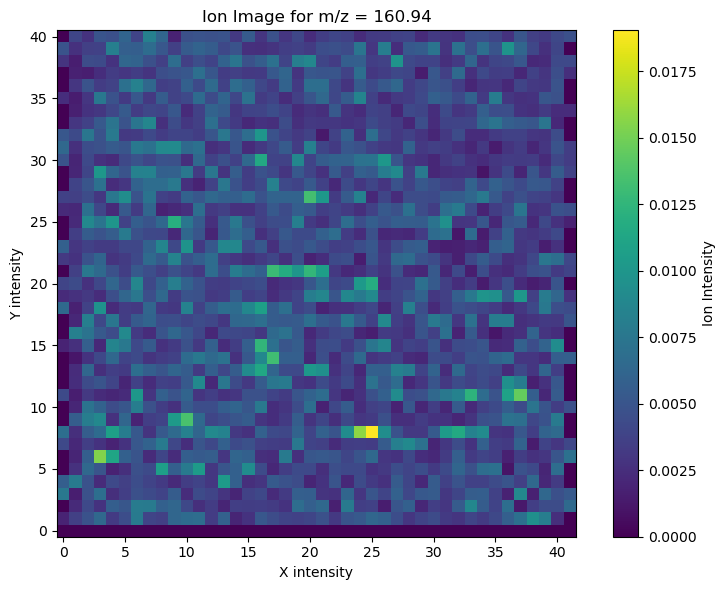

In [7]:
import matplotlib.pyplot as plt
# Choose the m/z you want to plot  and tolerance
target_mz = 160.94
tolerance = 1

# Get image dimensions
all_coords = [coord for _,  coord in my_spectra]
xs, ys, _ = zip(*all_coords)
width = max(xs) + 1
height = max(ys) + 1
print(width,height)
# Create empty image
ion_image = np.zeros((height, width))

# Process each spectrum
times = 0 
mz_mask = (my_mzs >= target_mz - tolerance) & (my_mzs <= target_mz + tolerance)
for  intensities,(x,y,z) in my_spectra:
    if np.any(mz_mask):
        times+=1
        ion_intensity = np.mean(intensities[mz_mask])
        ion_image[y, x] = ion_intensity
print(f"Points found", times)




# Plot the ion image
plt.figure(figsize=(8, 6))
plt.imshow(ion_image, cmap='viridis', origin='lower')
plt.colorbar(label='Ion Intensity')
plt.title(f"Ion Image for m/z = {target_mz}")
plt.xlabel("X intensity")
plt.ylabel("Y intensity")
plt.tight_layout()
plt.show()

In [10]:
common_mzs.shape

NameError: name 'common_mzs' is not defined